# Zillow Clustering

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

import wrangle_zillow as wr

## Acquire

In [2]:
df = wr.get_zillow_data()

In [3]:
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77575,673515,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,NaN,NaN,1286.0,1286.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34245368.0,-118282383.0,47405.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARE40,6.037101e+07,12447.0,3101.0,27328.0,96284.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13,0.020615,2017-09-20,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
77576,2968375,17239384,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,NaN,1612.0,1612.0,1612.0,NaN,NaN,1612.0,NaN,6111.0,1.0,2.0,2.0,560.0,NaN,NaN,34300140.0,-118706327.0,

## Prepare

In [4]:
imputer, train, validate, test = wr.prep_zillow(df)
train

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,county,tax_rate
30896,12188244,1.0,1.0,4.0,1.0,1018.0,6037.0,1.0,33975480.0,-118244737.0,7300.0,0100,6.037533e+07,396053.0,3101.0,95982.0,0.0,1.0,1924.0,14365.0,29461.0,2016.0,15096.0,963.13,6.037533e+13,-0.448155,2017-04-28,Floor/Wall,Single Family Residential,Los Angeles County,0.032692
19077,14494503,4.5,4.0,6.0,4.5,5363.0,6059.0,4.0,33633931.0,-117639411.0,7200.0,122,6.059032e+07,12773.0,1286.0,96996.0,0.0,1.0,1988.0,644057.0,1654764.0,2016.0,1010707.0,16554.02,6.059032e+13,-0.191694,2017-03-22,None,Single Family Residential,Orange County,0.010004
49660,11787851,1.0,1.0,6.0,1.0,720.0,6037.0,1.0,34047500.0,-118249000.0,6000.0,010G,6.037207e+07,12447.0,3101.0,95994.0,0.0,1.0,1912.0,68800.0,86000.0,2016.0,17200.0,2290.94,6.037207e+13,-0.112858,2017-06-23,Central,Single Family Residential,Los Angeles County,0.026639
66688,11322232,3.0,4.0,8.0,3.0,2570.0,6037.0,3.0,34655733.0,-118253931.0,9433.0,0100,6.037901e+07,5534.0,3101.0,97319.0,0.0,1.0,2010.0,261032.0,323632.0,2016.0,62600.0,8013.83,6.037901e+13,0.016220,2017-08-15,Central,Single Family Residential,Los Angeles County,0.024762
36468,14165581,3.5,4.0,6.0,3.5,3742.0,6059.0,3.0,33901573.0,-117807287.0,10615.0,1,6.059022e+07,21412.0,1286.0,97078.0,0.0,1.0,2005.0,751661.0,1361000.0,2016.0,609339.0,15479.88,6.059022e+13,-0.012199,2017-05-16,None,Single Family Residential,Orange County,0.011374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11615,12833306,2.0,4.0,6.0,2.0,1136.0,6037.0,2.0,34003315.0,-117949854.0,5942.0,0100,6.037409e+07,45602.0,3101.0,96489.0,0.0,1.0,1958.0,34292.0,49699.0,2016.0,15407.0,891.41,6.037409e+13,0.001586,2017-02-22,Floor/Wall,Single Family Residential,Los Angeles County,0.017936
72879,14058473,2.0,4.0,6.0,2.0,1912.0,6059.0,2.0,33662020.0,-117951318.0,6786.0,122,6.059099e+07,25218.0,1286.0,96964.0,8.0,1.0,1966.0,109333.0,376004.0,2016.0,266671.0,4437.28,6.059099e+13,0.078598,2017-09-01,None,Single Family Residential,Orange County,0.011801
49482,14205299,2.5,3.0,6.0,2.5,1709.0,6059.0,2.0,33853406.0,-117742591.0,5800.0,122,6.059022e+07,16764.0,1286.0,97027.0,0.0,1.0,1994.0,197560.0,652386.0,2016.0,454826.0,7086.52,6.059022e+13,0.007020,2017-06-22,None,Single Family Residential,Orange County,0.010862
10277,14094533,2.0,5.0,6.0,2.0,2013.0,6059.0,2.0,33778216.0,-118035963.0,6800.0,122,6.059110e+07,24832.0,1286.0,97052.0,8.0,1.0,1964.0,56842.0,83624.0,2016.0,26782.0,1506.46,6.059110e+13,0.173455,2017-02-16,None,Single Family Residential,Orange County,0.018015


In [5]:
imputer

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [6]:
train.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
county        

In [7]:
validate.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
county        

In [8]:
test.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
county        

## Explore

#### 1. Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

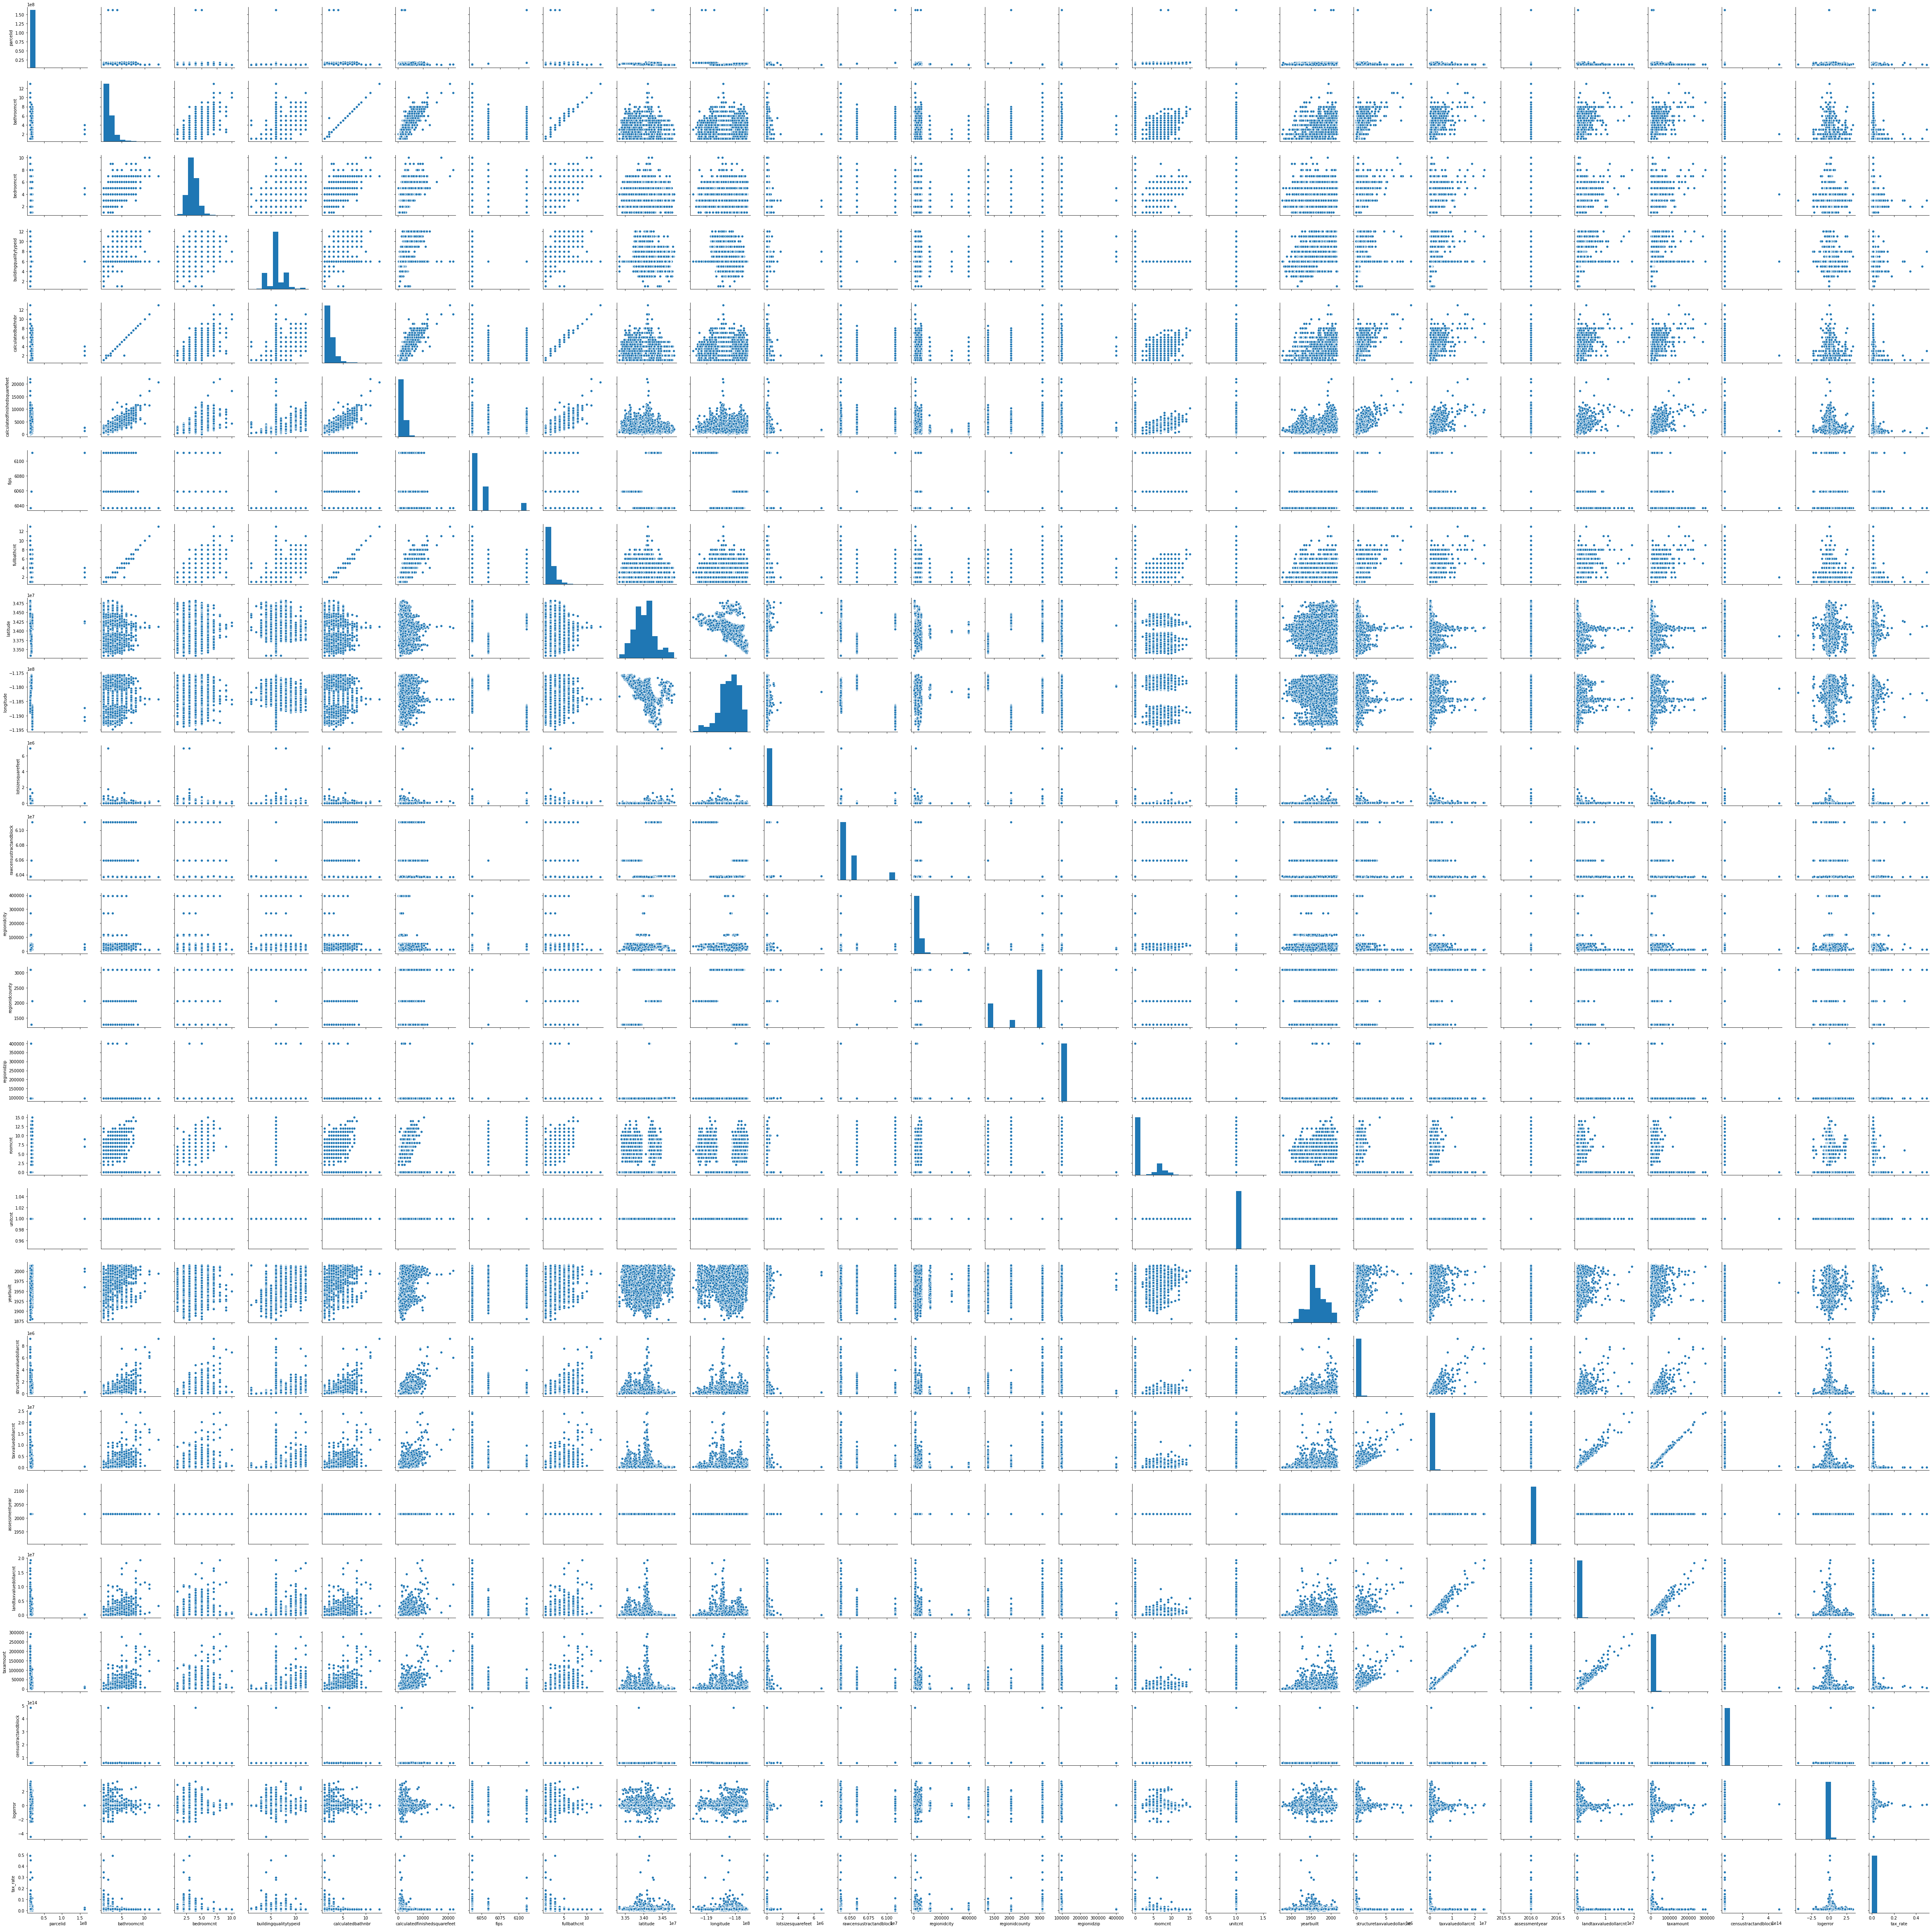

In [9]:
sns.pairplot(train)

#### 2. Plot a correlation matrix heatmap.

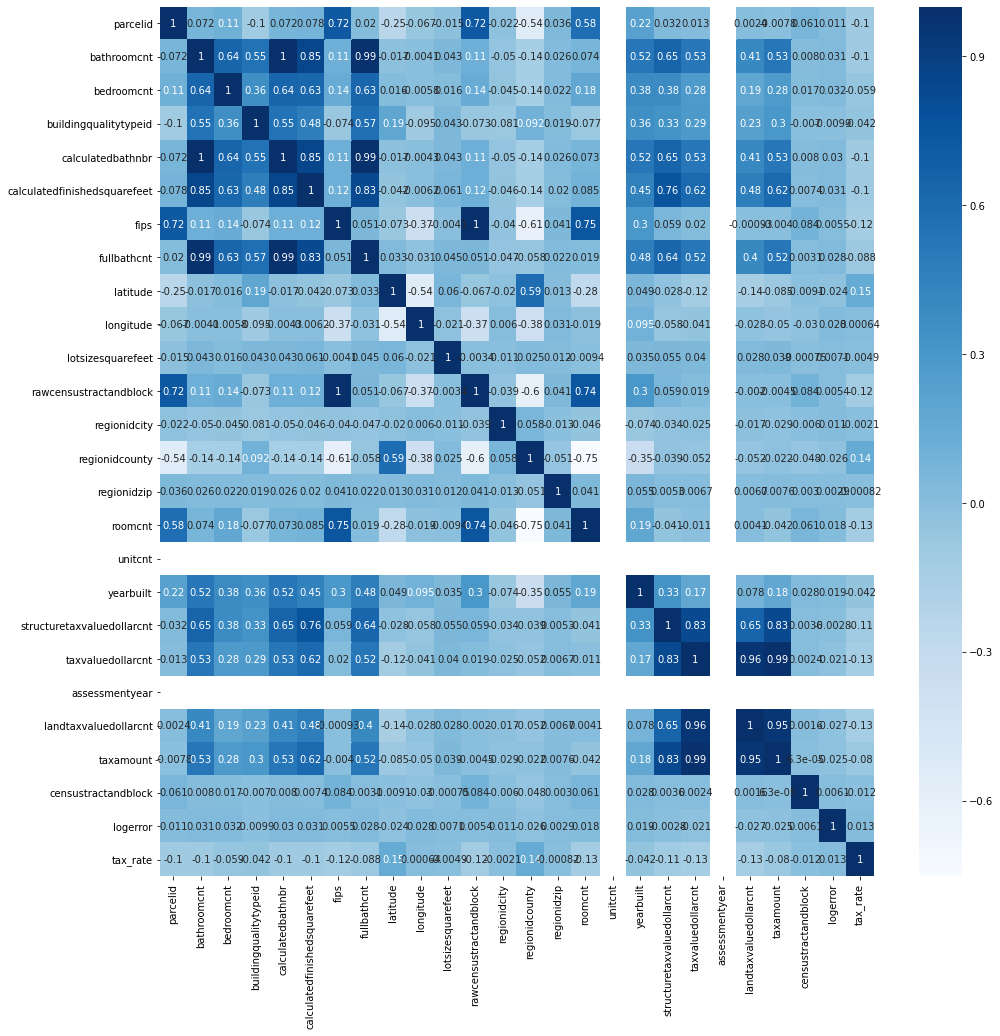

In [10]:
plt.figure(figsize=(16, 16))
sns.heatmap(train.corr(), annot=True, cmap="Blues")
plt.show()

#### 3. Plot latitude against longitude.

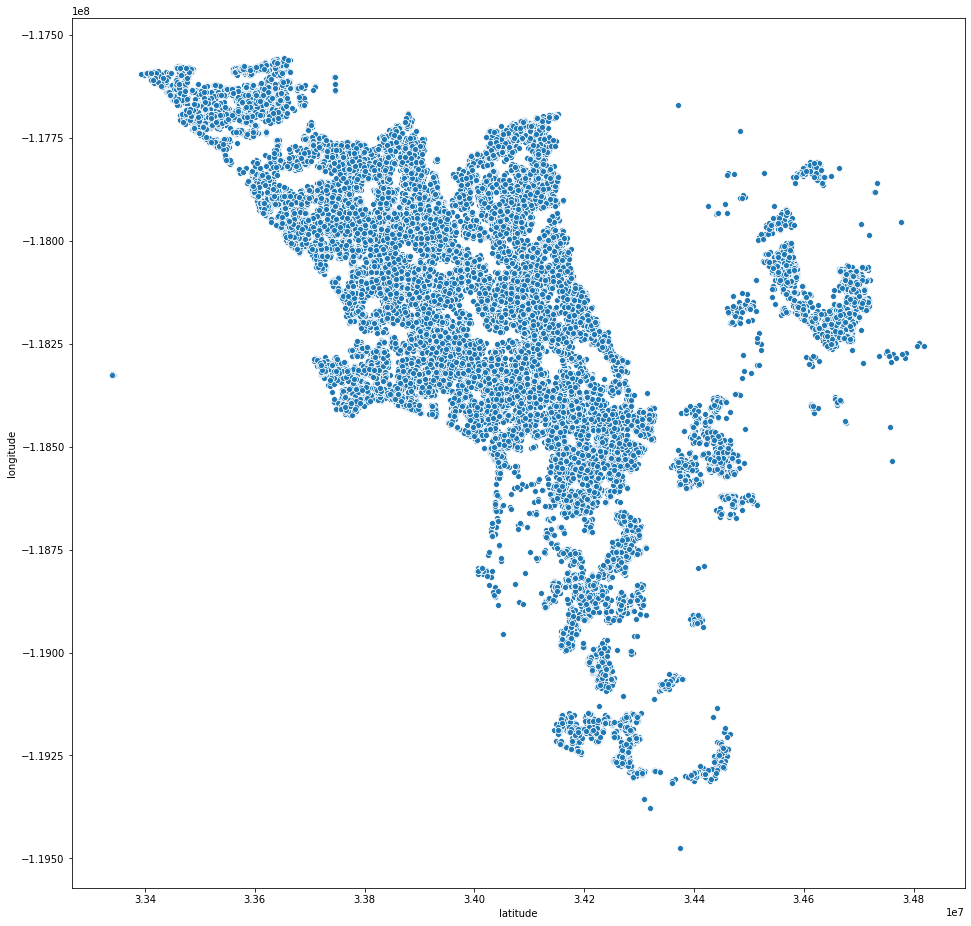

In [11]:
plt.figure(figsize=(16, 16))
sns.scatterplot(x=train.latitude, y=train.longitude)
plt.show()

> **Resembles like SoCal! Who woulda guessed?!**

#### 4. Create a useable plot with 4 dimensions, e.g. x, y, color, size.

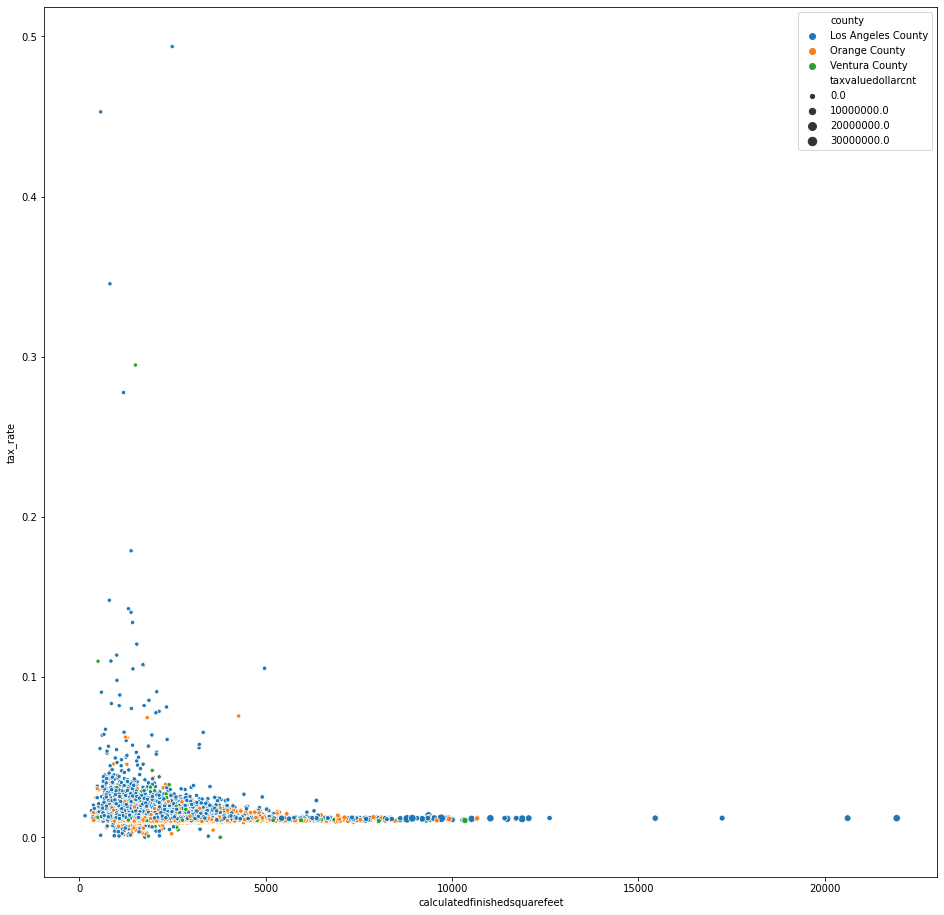

In [12]:
plt.figure(figsize=(16, 16))
sns.scatterplot(x=train.calculatedfinishedsquarefeet, y=train.tax_rate, hue=train.county, size=train.taxvaluedollarcnt)
plt.show()

#### 5. Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

$H_0$: The mean logerror by zipcode is the same as the population's mean logerror

$H_a$: The mean logerror by zipcode is different than the population's mean logerror

In [13]:
alpha = .001

x = train[train.regionidzip == 96379.0].logerror
mu = train.logerror.mean()

tstat, p = stats.ttest_1samp(x, mu)
print(f"t-statistic = {tstat}")
print(f"    p-value = {p}")
print()
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

t-statistic = 1.300659856843244
    p-value = 0.1965545373865

Fail to reject null hypothesis


In [14]:
alpha = .001

mu = train.logerror.mean()

for zipcode in train.regionidzip.unique():
    x = train[train.regionidzip == zipcode].logerror
    tstat, p = stats.ttest_1samp(x, mu)
    if p < alpha:
        print("Reject null hypothesis")
        print(f"""It can be stated with 99.9% certainty that, the mean logerror in zipcode {zipcode} is different than 
        the population's mean logerror.""")
        print()
    else:
        print("Fail to reject null hypothesis")
        print(f"""It can be stated with 99.9% certainty that, the mean logerror in zipcode {zipcode} is the same as 
        the population's mean logerror""")
        print()

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 95982.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96996.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 95994.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 97319.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 97078.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 97328.0 is the same as 
        the population's mean lo

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96401.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96361.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96270.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96971.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96987.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96411.0 is the same as 
        the population's mean lo

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 97094.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96020.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96237.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96939.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96375.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 97079.0 is the same as 
        the population's mean lo

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 95996.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 97331.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96467.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 97092.0 is the same as 
        the population's mean logerror



#### 6. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

$H_0$: The mean logerror by county is the same

$H_0$: The mean logerror by county is different

In [15]:
alpha = .001

la = train[train.county == "Los Angeles County"].logerror
orange = train[train.county == "Orange County"].logerror
ventura = train[train.county == "Ventura County"].logerror

f, p = stats.f_oneway(la, orange, ventura)
print(f"statistic = {f}")
print(f"  p-value = {p}")
print()
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

statistic = 13.435617795518072
  p-value = 1.4705833166764676e-06

Reject null hypothesis
